## 数据集下载

In [ ]:
import tensorflow as tf
import tensorflow_core.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("/data/MNIST_data/", one_hot=True)

print(
    "训练集 train 数量：",
    mnist.train.num_examples,
    ",验证集 validation 数量：",
    mnist.validation.num_examples,
    ",测试集 test 数量：",
    mnist.test.num_examples,
)


In [ ]:
print(
    "train images shape:",
    mnist.train.images.shape,
    "labels shaple:",
    mnist.train.labels.shape,
)


In [ ]:
len(mnist.train.images[0])


In [ ]:
mnist.train.images[0].shape


In [ ]:
mnist.train.images[0]


In [ ]:
mnist.train.images[0].reshape(28, 28)


In [ ]:
import matplotlib.pyplot as plt


def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap="binary")
    plt.show()


plot_image(mnist.train.images[0])

In [ ]:
import numpy as np

int_array = np.array([i for i in range(64)])
print(int_array)

In [ ]:
int_array.reshape(8, 8)


In [ ]:
int_array.reshape(4, 16)


In [ ]:
plt.imshow(mnist.train.images[20000].reshape(14, 56), cmap="binary")
plt.show()


In [ ]:
plt.imshow(mnist.train.images[20000].reshape(7, 112), cmap="binary")
plt.show()


In [ ]:
mnist.train.labels[1]

In [ ]:
import numpy as np

np.argmax(mnist.train.labels[1])


In [ ]:
mnist_no_one_hot = input_data.read_data_sets("/data/MNIST_data/", one_hot=False)

print(mnist_no_one_hot.train.labels[0:10])

In [ ]:
print(mnist.train.images[0:10])

print(mnist.train.labels[0:10])

数据的批量读取
它是针对专门的模型训练所提供的方法，所以在next_batch 内部实现时会对数据集先做一个shuffle， 即洗牌，把数据都打乱。

In [ ]:
batch_images_xs, batch_labels_ys = mnist.train.next_batch(batch_size=10)

print(batch_images_xs.shape, batch_labels_ys.shape)

print(batch_images_xs)
print(batch_labels_ys)

batch_images_xs, batch_labels_ys = mnist.train.next_batch(batch_size=10)
print(batch_labels_ys)


In [ ]:
print(
    "validation images:",
    mnist.validation.images.shape,
    "labels:",
    mnist.validation.labels.shape,
)


In [ ]:
print("test images:", mnist.test.images.shape, "labels:", mnist.test.labels.shape)

argmax()用法.py

In [20]:
import tensorflow as tf
import numpy as np

arr1 = np.array([1, 3, 2, 5, 7, 0])
arr2 = np.array([[1.0, 2, 3], [3, 2, 1], [4, 7, 2], [8, 3, 2]])
print("arr1=", arr1)
print("arr2=\n", arr2)

argmax_1 = tf.argmax(arr1)
argmax_20 = tf.argmax(
    arr2, 0
)  # 指定第二个参数为0，按第一维（行）的元素取值，即同列的每一行
argmax_21 = tf.argmax(
    arr2, 1
)  # 指定第二个参数为1，则第二维（列）的元素取值，即同行的每一列
argmax_22 = tf.argmax(arr2, -1)  # 指定第二个参数为-1，则第最后维的元素取值

with tf.Session() as sess:
    print(argmax_1.eval())
    print(argmax_20.eval())
    print(argmax_21.eval())
    print(argmax_22.eval())

with tf.Session() as sess:
    print(tf.nn.softmax(arr2).eval())
    print(tf.nn.softmax(arr2, 0).eval())
    print(tf.nn.softmax(arr2, 1).eval())


arr1= [1 3 2 5 7 0]
arr2=
 [[1. 2. 3.]
 [3. 2. 1.]
 [4. 7. 2.]
 [8. 3. 2.]]
4
[3 2 0]
[2 0 1 0]
[2 0 1 0]
[[0.09003057 0.24472847 0.66524096]
 [0.66524096 0.24472847 0.09003057]
 [0.04712342 0.94649912 0.00637746]
 [0.99086747 0.00667641 0.00245611]]
[[8.88803760e-04 6.53033756e-03 5.34446645e-01]
 [6.56742084e-03 6.53033756e-03 7.23294881e-02]
 [1.78521007e-02 9.69188027e-01 1.96611933e-01]
 [9.74691675e-01 1.77512979e-02 1.96611933e-01]]
[[0.09003057 0.24472847 0.66524096]
 [0.66524096 0.24472847 0.09003057]
 [0.04712342 0.94649912 0.00637746]
 [0.99086747 0.00667641 0.00245611]]


了解 tf.random_normal.py

[ 1.2743005   0.787386    0.84657717 -0.47701612 -0.4029044   1.6520668
  1.1465226  -0.58316964  0.23539265  0.87146825]


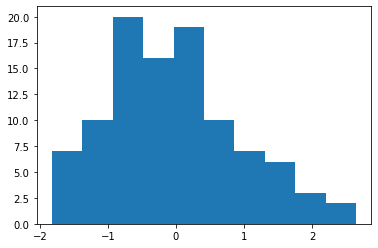

In [21]:
norm = tf.random_normal([100])  # 生成100个随机数
with tf.Session() as sess:
    norm_data = norm.eval()
print(norm_data[:10])  # 打印前10个随机数

import matplotlib.pyplot as plt

plt.hist(norm_data)
plt.show()


# 分类模型构建与训练

## 模型构建

In [22]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/data/MNIST_data/", one_hot=True)


Extracting /data/MNIST_data/train-images-idx3-ubyte.gz
Extracting /data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [23]:
# 定义x和y的占位符
# mnist 中每张图片共有28*28=784个像素点
x = tf.placeholder(tf.float32, [None, 784], name="X") 

# 0-9 一共10个数字=> 10 个类别
y = tf.placeholder(tf.float32, [None, 10], name="Y")  

# 定义变量
W = tf.Variable(tf.random_normal([784, 10]),name="W")
b = tf.Variable(tf.zeros([10]),name="b") 

forward=tf.matmul(x, W) + b # 前向计算

pred = tf.nn.softmax(forward) # Softmax分类

## 训练模型

In [24]:
# 设置训练参数
train_epochs = 50  # 训练轮数
batch_size = 100  # 单次训练样本数（批次大小）
total_batch = int(mnist.train.num_examples / batch_size)  # 一轮训练有多少批次
display_step = 1  # 显示粒度
learning_rate = 0.01  # 学习率

# 定义交叉熵损失函数
loss_function = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=1))

# 梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

# 定义准确率
# 检查预测类别tf.argmax(pred, 1)与实际类别tf.argmax(y, 1)的匹配情况
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# 准确率，将布尔值转化为浮点数，并计算平均值
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()  # 声明会话
init = tf.global_variables_initializer()  # 变量初始化
sess.run(init)


In [25]:
# 开始训练
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)  # 读取批次数据
        sess.run(optimizer, feed_dict={x: xs, y: ys})  # 执行批次训练

    # total_batch个批次训练完成后，使用验证数据计算误差与准确率；验证集没有分批
    loss, acc = sess.run(
        [loss_function, accuracy],
        feed_dict={x: mnist.validation.images, y: mnist.validation.labels},
    )
    # 打印训练过程中的详细信息
    if (epoch + 1) % display_step == 0:
        print(
            "Train Epoch:",
            "%02d" % (epoch + 1),
            "Loss=",
            "{:.9f}".format(loss),
            " Accuracy=",
            "{:.4f}".format(acc),
        )

print("Train Finished!")


Train Epoch: 01 Loss= 6.384902954  Accuracy= 0.2262
Train Epoch: 02 Loss= 3.979636669  Accuracy= 0.4076
Train Epoch: 03 Loss= 2.946542025  Accuracy= 0.5126
Train Epoch: 04 Loss= 2.397297621  Accuracy= 0.5776
Train Epoch: 05 Loss= 2.057711601  Accuracy= 0.6238
Train Epoch: 06 Loss= 1.829461575  Accuracy= 0.6558
Train Epoch: 07 Loss= 1.661448479  Accuracy= 0.6840
Train Epoch: 08 Loss= 1.536069632  Accuracy= 0.6986
Train Epoch: 09 Loss= 1.435309172  Accuracy= 0.7192
Train Epoch: 10 Loss= 1.353301883  Accuracy= 0.7322
Train Epoch: 11 Loss= 1.284931540  Accuracy= 0.7436
Train Epoch: 12 Loss= 1.227354884  Accuracy= 0.7522
Train Epoch: 13 Loss= 1.178907156  Accuracy= 0.7630
Train Epoch: 14 Loss= 1.134232283  Accuracy= 0.7722
Train Epoch: 15 Loss= 1.095933557  Accuracy= 0.7794
Train Epoch: 16 Loss= 1.062056065  Accuracy= 0.7850
Train Epoch: 17 Loss= 1.030964494  Accuracy= 0.7916
Train Epoch: 18 Loss= 1.003479481  Accuracy= 0.7964
Train Epoch: 19 Loss= 0.978710175  Accuracy= 0.8006
Train Epoch:

## 评估模型

In [27]:
# 测试集
accu_test = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

print("Test Accuracy:", accu_test)

# 验证集
accu_validation = sess.run(
    accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels}
)

print("Validate Accuracy:", accu_validation)

# 训练集
accu_train = sess.run(
    accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels}
)

print("Train Accuracy:", accu_train)


Test Accuracy: 0.8599
Validate Accuracy: 0.8512
Train Accuracy: 0.8510909


## 进行预测

In [29]:
# 由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字
prediction_result = sess.run(tf.argmax(pred, 1), feed_dict={x: mnist.test.images})


In [30]:
# 查看预测结果中的前10项
prediction_result[0:10]


array([7, 2, 1, 0, 4, 1, 4, 4, 6, 9], dtype=int64)

In [31]:
mnist.train.labels[0:10]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## 定义可视化函数

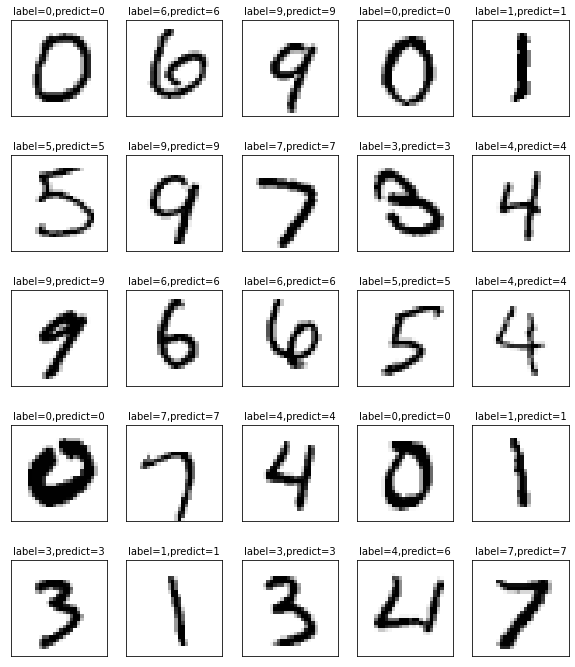

In [32]:
import matplotlib.pyplot as plt
import numpy as np


def plot_images_labels_prediction(
    images,  # 图像列表
    labels,  # 标签列表
    prediction,  # 预测值列表
    index,  # 从第index个开始显示
    num=10,
):  # 缺省一次显示 10 幅
    fig = plt.gcf()  # 获取当前图表，Get Current Figure
    fig.set_size_inches(10, 12)  # 1英寸等于 2.54 cm
    if num > 25:
        num = 25  # 最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)  # 获取当前要处理的子图

        ax.imshow(
            np.reshape(images[index], (28, 28)),  # 显示第index个图像
            cmap="binary",
        )

        title = "label=" + str(np.argmax(labels[index]))  # 构建该图上要显示的title信息
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[index])

        ax.set_title(title, fontsize=10)  # 显示图上的title信息
        ax.set_xticks([])  # 不显示坐标轴
        ax.set_yticks([])
        index += 1
    plt.show()


plot_images_labels_prediction(
    mnist.test.images, mnist.test.labels, prediction_result, 10, 25
)
